## 1. Introduction

Kyphosis is an abnormally excessive convex curvature of the spine. Children with kyphosis have a rounded or "hunchback" appearance. While some children are born with kyphosis, most cases develop during adolescence.

This project is going to predict the presence of Kyphosis among children with 3 machine learning models: Logistic Regression Classifier, Decision Trees Classifier, and Random Forest Classifier.

The dataset can be found in [Kaggle](https://www.kaggle.com/datasets/abbasit/kyphosis-dataset). It has the following fields:
- `Kyphosis`: a factor with levels "absent" or "present" indicating if Kyphosis was present after the operation.
- `Age`: the individual's age in months
- `Number`: the number of vertebrae involved
- `Start`: the number of the first (topmost) vertebra operated on.

## 2. Import the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

# set float format
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# set seaborn theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 
                 "figure.dpi":100, 'savefig.dpi':100}
sns.set_theme(style="ticks", rc=custom_params)
%config InlineBackend.figure_format = "retina"

In [2]:
ky_df = pd.read_csv("data/kyphosis.csv")
ky_df.head() 

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
ky_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


There is no missing values. `Kyphosis` is the only object type.

In [4]:
ky_df.describe()

,Age,Number,Start
count,81.000,81.000,81.000
mean,83.654,4.049,11.494
std,58.104,1.619,4.884
min,1.000,2.000,1.000
25%,26.000,3.000,9.000
50%,87.000,4.000,13.000
75%,130.000,5.000,16.000
max,206.000,10.000,18.000


In [5]:
max_age = round(ky_df['Age'].max()/12, 1)
print(f'Oldest: {max_age} years')

Oldest: 17.2 years


The max value of Age is around 17 as the dataset is related to kyphosis on children.

## 3. EDA

### Age

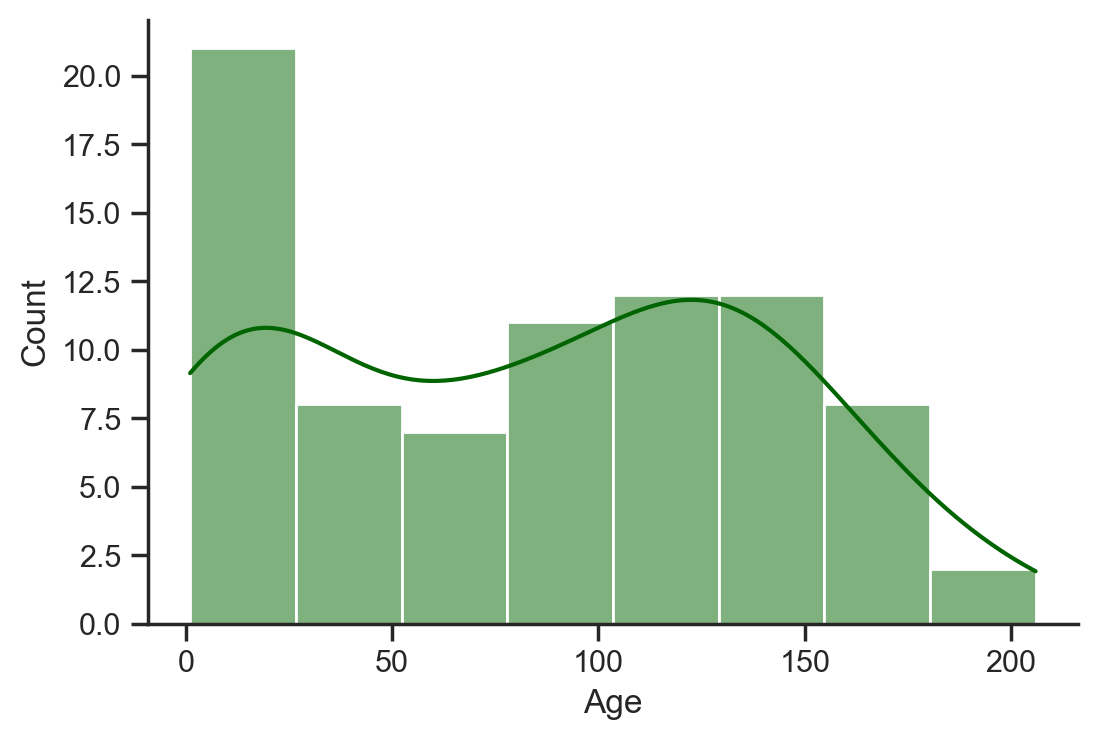

In [6]:
sns.histplot(data=ky_df, x="Age", color="darkgreen", kde=True)
plt.show()

### Number

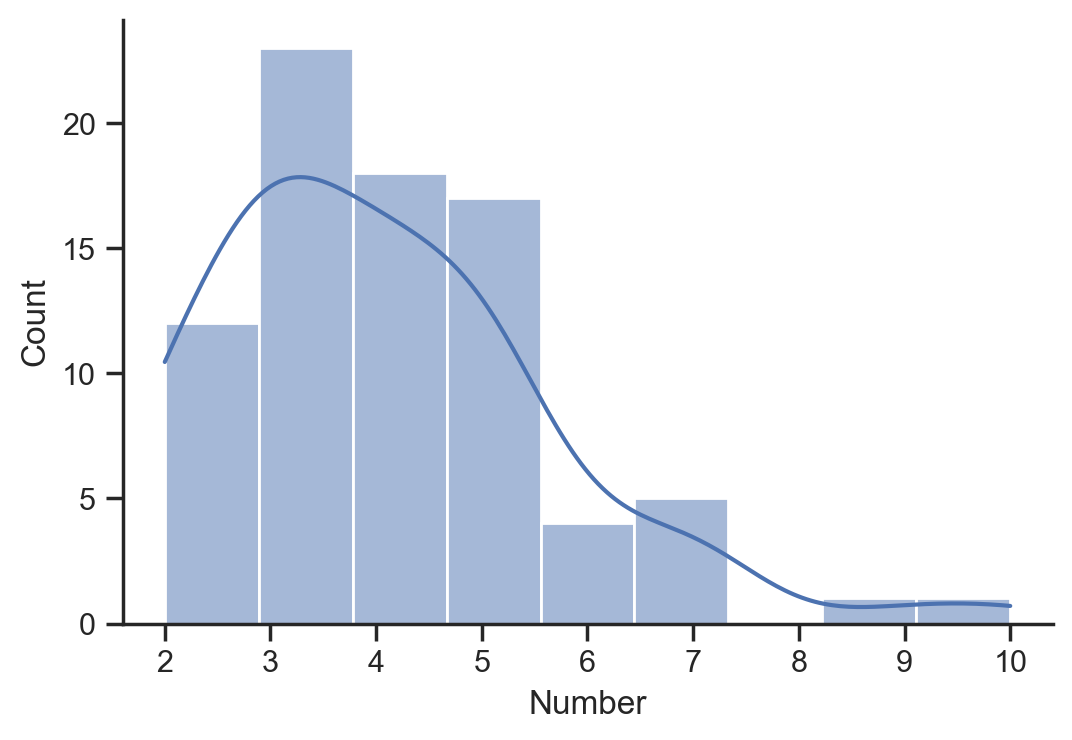

In [7]:
sns.histplot(data=ky_df, x="Number", kde=True)
plt.show()

### Start

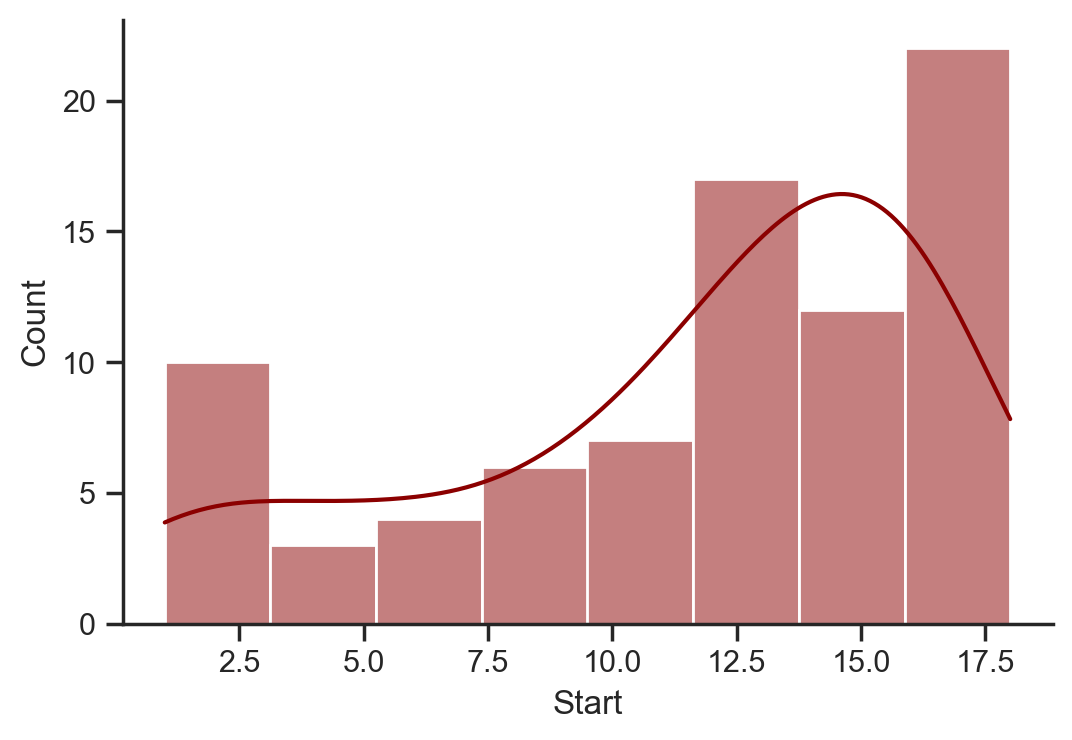

In [8]:
sns.histplot(data=ky_df, x="Start", color="darkred", kde=True)
plt.show()

### Present vs. Absent

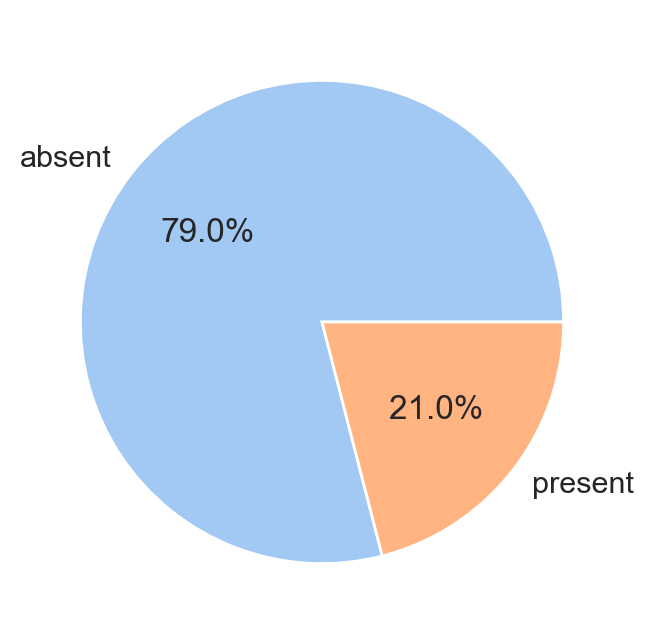

In [9]:
counts = ky_df["Kyphosis"].value_counts().reset_index()
palette_color = sns.color_palette('pastel')
plt.pie(counts['Kyphosis'].tolist(), labels=counts['index'].tolist(), colors=palette_color, autopct='%.1f%%')
plt.show()

Disease present after operation percentage is 21% in this dataset, which also indicating samples are imbalance, samples with "absent" are much more than "present".

### Correlation

Beforing showing any correlations, we need to ensure `Kyphosis` is numeric.

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

LabelEncoder_y = LabelEncoder()
ky_df['Kyphosis'] = LabelEncoder_y.fit_transform(ky_df['Kyphosis'])
ky_df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


Now "absent" is 0, while "present" is 1.

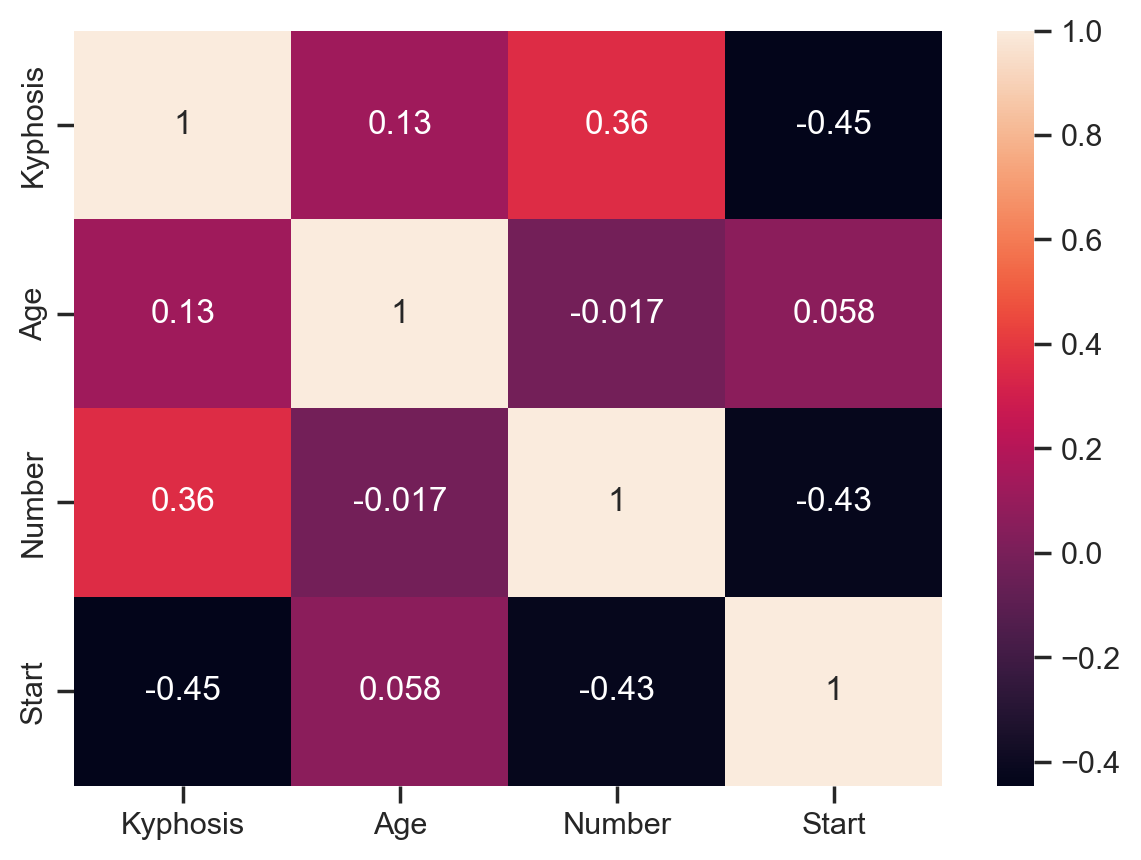

In [11]:
plt.figure(figsize=(7, 5))
sns.heatmap(data=ky_df.corr(), annot=True)
plt.show()

Kyphosis appears to be negatively correlated with Start (the number of the topmost vertebra operated on).

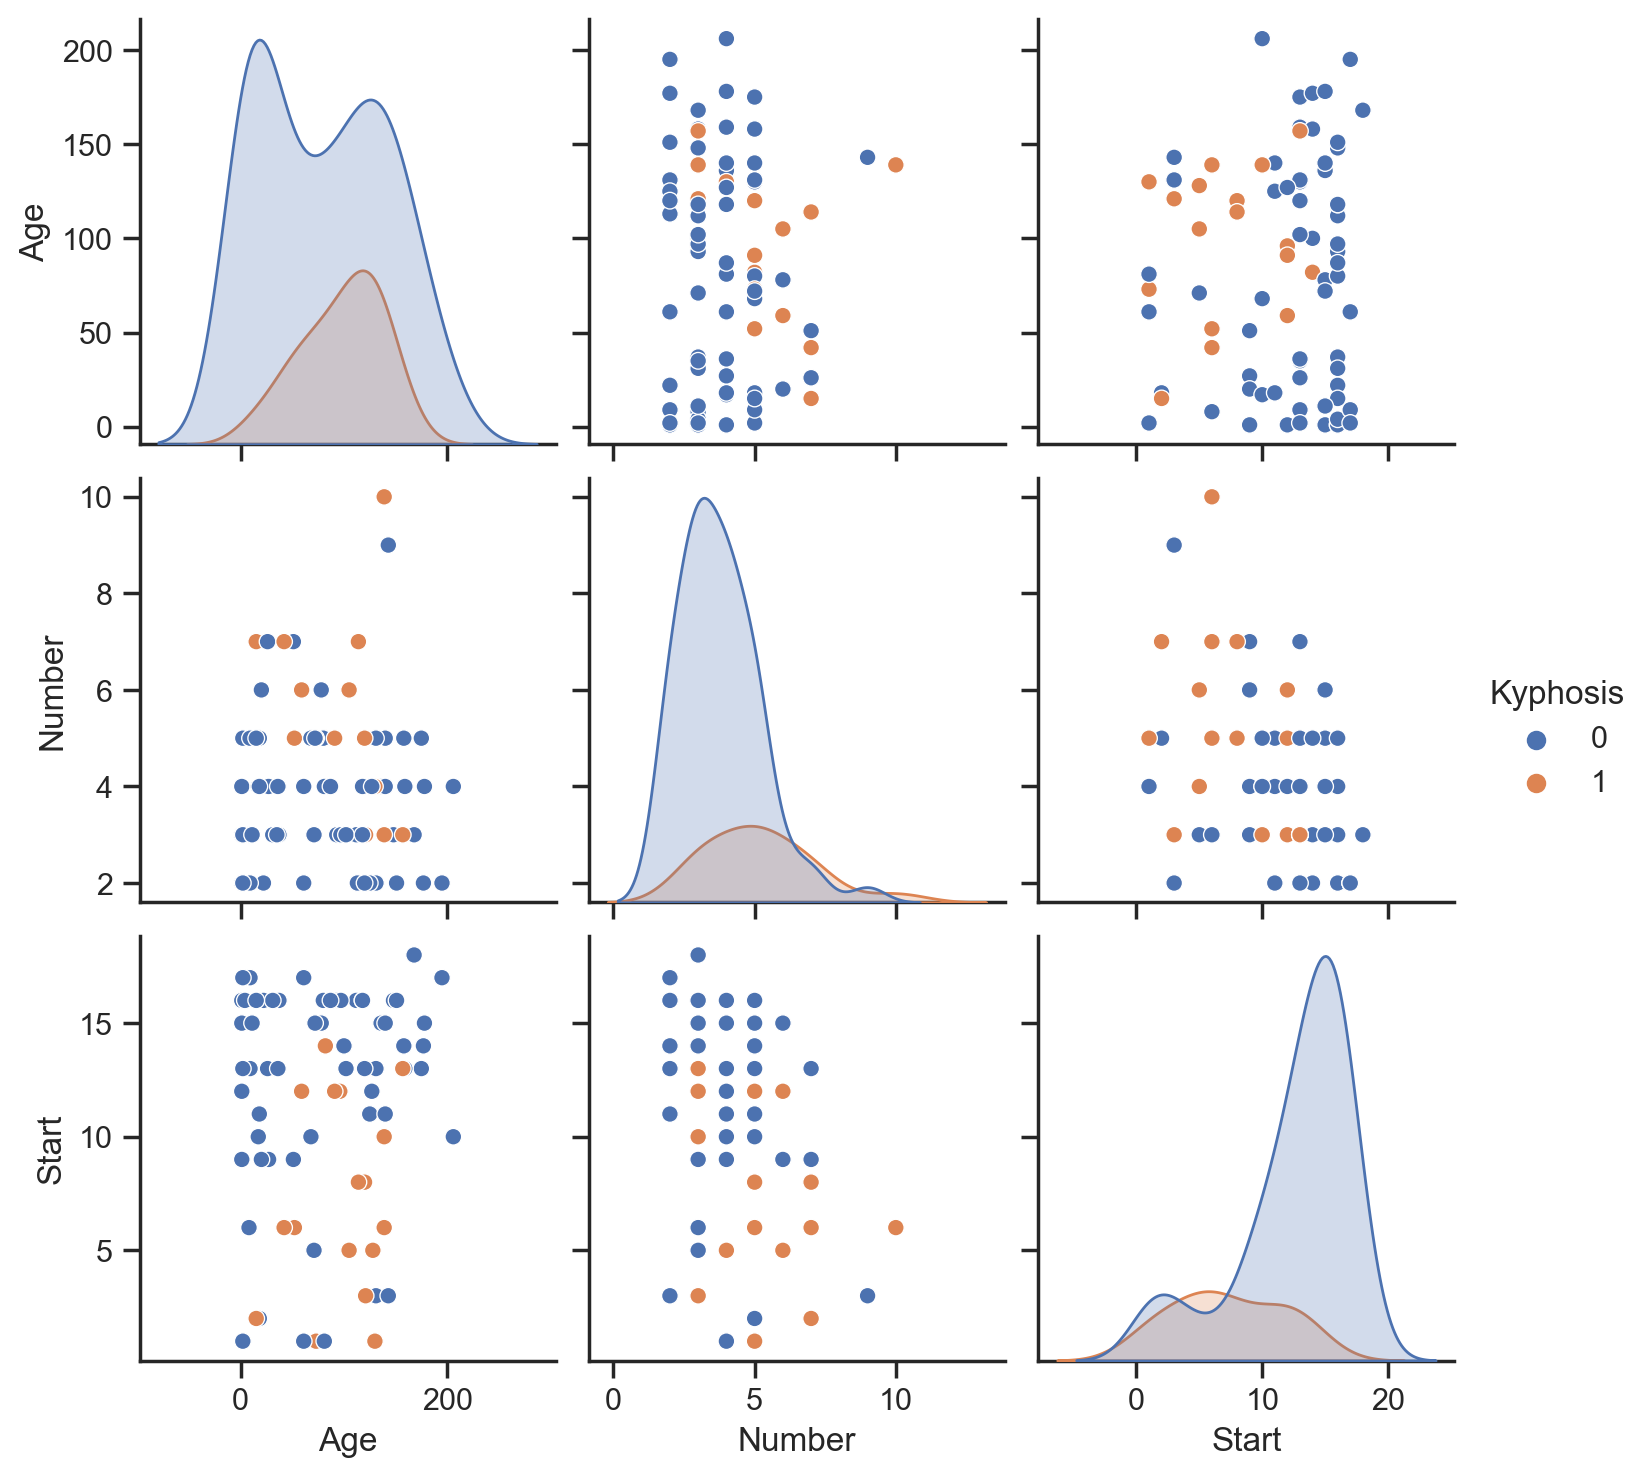

In [12]:
sns.pairplot(data=ky_df, hue='Kyphosis')
plt.show()

## 4. Create Train and Test Datasets

In the EDA section we've known the sample size of present vs. absent of Kyphosis is 79:21, which is super inbalance.

In [13]:
from sklearn.model_selection import train_test_split

# split X and y
X = ky_df.copy()
y = X.pop('Kyphosis')

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [14]:
# double check the corresponding dimensions
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64, 3)
(17, 3)
(64,)
(17,)


## 5. Logistic Regression

### Train the Model

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### Prediction and Evaluation

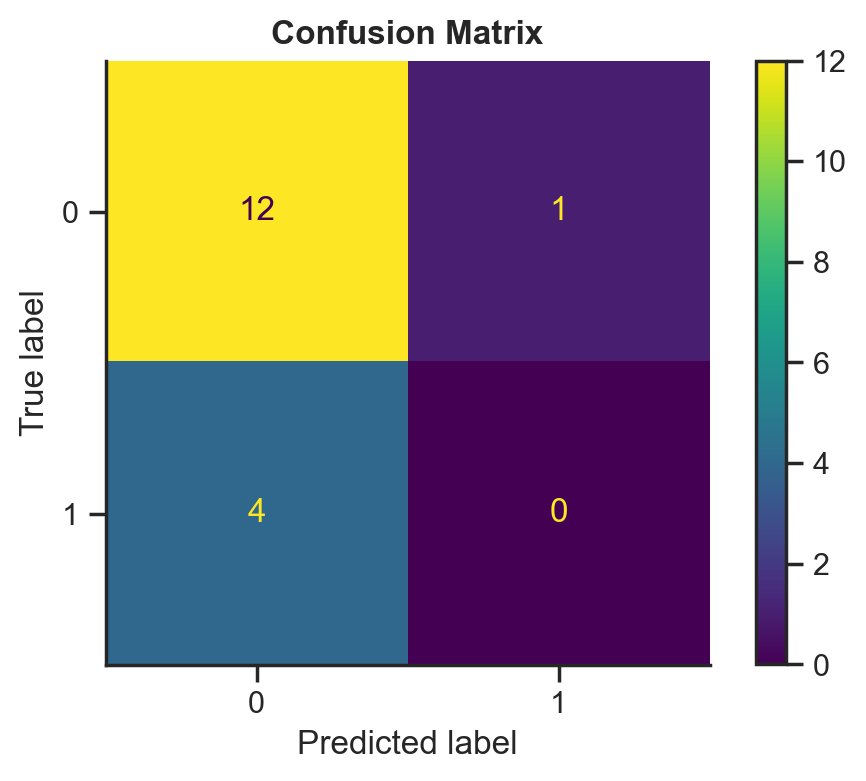

=============== Classification Report ===============
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.00      0.00      0.00         4

    accuracy                           0.71        17
   macro avg       0.38      0.46      0.41        17
weighted avg       0.57      0.71      0.63        17



In [16]:
def plot_confusion_matrix(model, X_test, y_test):   
    # predict test result
    y_test_predict = model.predict(X_test)
    # get the Confusion Matrix
    cm = confusion_matrix(y_test, y_test_predict)
    # Confusion Matrix visualization
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title("Confusion Matrix", fontweight="bold")
    plt.show()
    
    # show classification report
    print("=============== Classification Report ===============")
    print(classification_report(y_test, y_test_predict))
    
plot_confusion_matrix(lr, X_test, y_test)

According to the Classification Report, the recall of "present" of Kyphosis is 0, which means all patients who have Kyphosis after operation are mis-classified as "absent" of Kyphosis. As a result, those patients may not receive adequate follow-up care or preventions.

The main reason is the small size of test dataset, and also the imbalance of the whole dataset. One of the easist way to improve the performance is to use a different threshold other than the default 0.5.

Let's check how threshold affects AUC (Area under the ROC Curve).

### AUC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.865


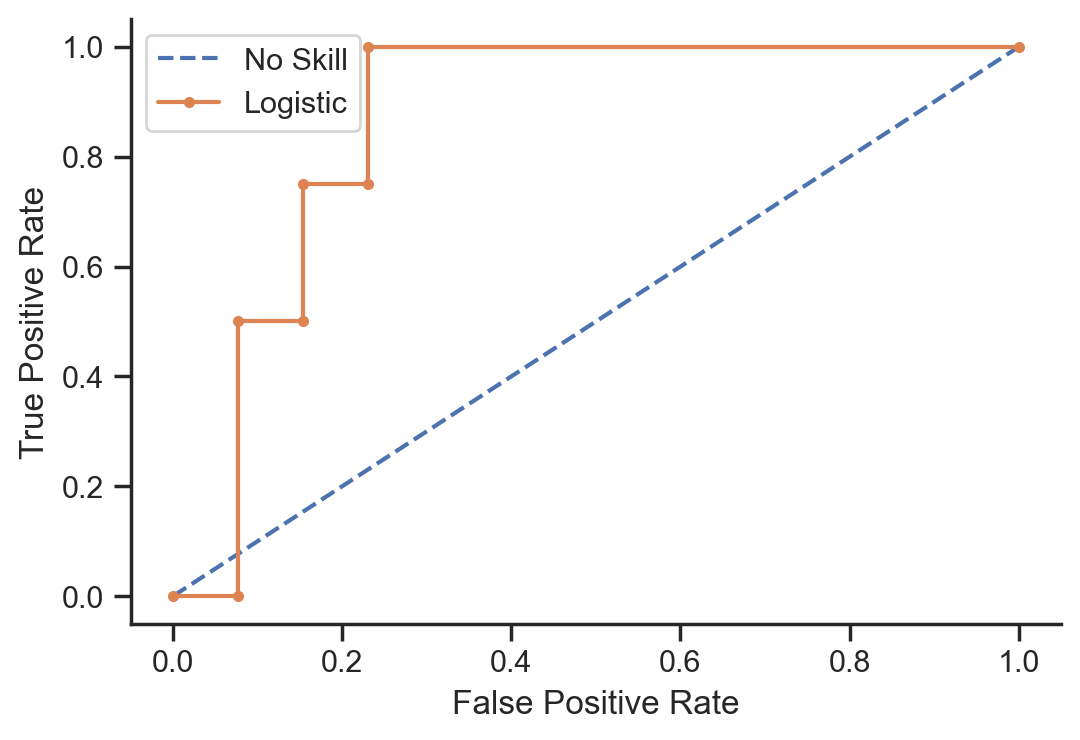

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction which predicts all 0
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_predicted_probs = lr.predict_proba(X_test)

# keep probabilities for class 1 only
lr_probs = lr_predicted_probs[:, 1]

# compute area under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, ns_thresholds = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The ROC curse is not smoonth due to the small test set.

### Find the optimal threshold

The geometric mean or known as G-mean is the geometric mean of sensitivity (known as recall) and specificity. It's one of the unbiased evaluation metrics for imbalanced classification.

$\displaystyle G-Mean = \sqrt{Sensitivity*Specificity}
        = \sqrt{TPR*(1-FPR)}$

In [18]:
# calculate G-Mean
gmean = np.sqrt(lr_fpr * (1 - lr_fpr))

# get the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(lr_thresholds[index], ndigits = 4)
thresholdOpt

0.1382

Next, let's re-train the model and make a prediction with the optimal threhold.

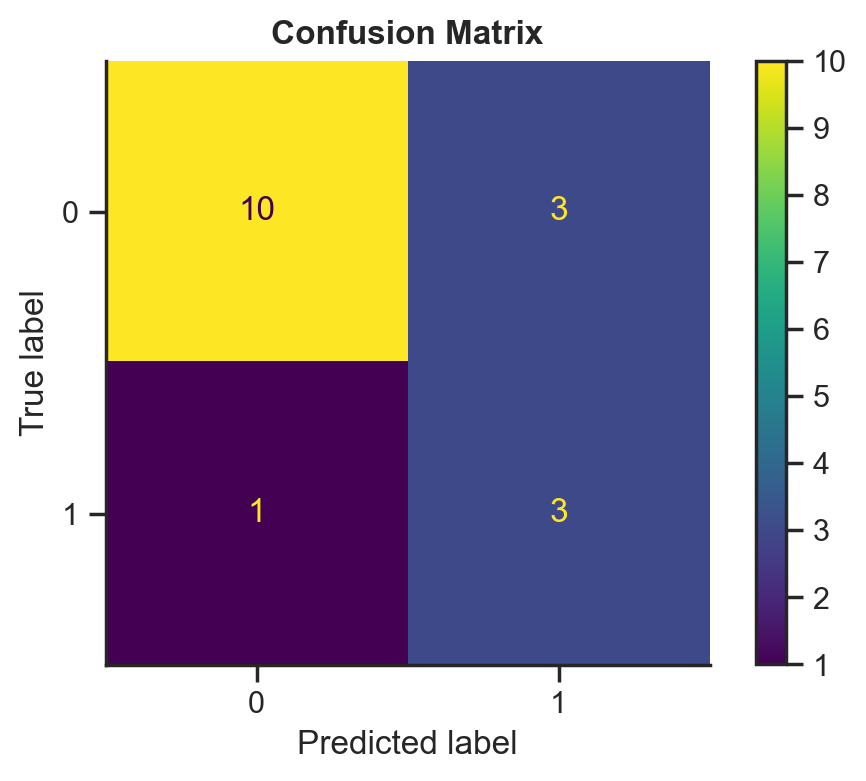

=============== Classification Report ===============
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.50      0.75      0.60         4

    accuracy                           0.76        17
   macro avg       0.70      0.76      0.72        17
weighted avg       0.81      0.76      0.78        17



In [19]:
# re-predict with the new threshold value
lr = LogisticRegression()
lr.fit(X_train, y_train)

def custom_predict(model, X_test, threshold):
    probs = model.predict_proba(X_test) 
    return (probs[:, 1] > threshold).astype(int)
    
y_test_predict_new = custom_predict(lr, X_test, threshold=thresholdOpt)

# confusion matrix
cm = confusion_matrix(y_test, y_test_predict_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix", fontweight="bold")
plt.show()

# show classification report
print("=============== Classification Report ===============")
print(classification_report(y_test, y_test_predict_new))

After applying the custom threshold, recall of "present" of Kyphosis has increased from 0 to 0.75.
In addition, both the precision and accuracy have been improved.

Let's check the performance of other models.

## 6. Decision Trees Classifier

### Train the Model

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Prediction and Evaluation

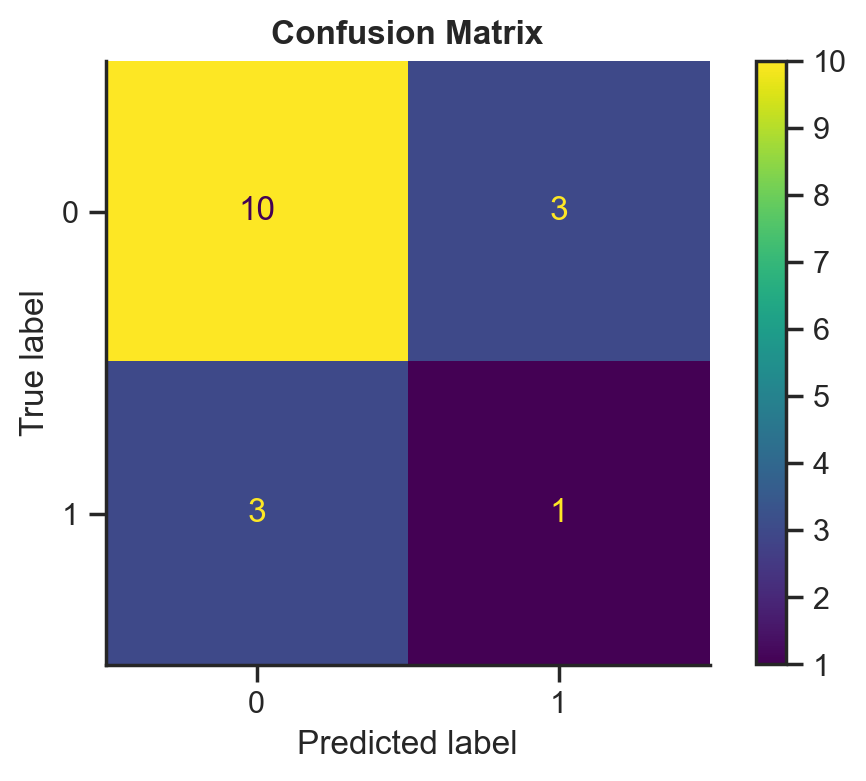

=============== Classification Report ===============
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.25      0.25      0.25         4

    accuracy                           0.65        17
   macro avg       0.51      0.51      0.51        17
weighted avg       0.65      0.65      0.65        17



In [21]:
plot_confusion_matrix(dt, X_test, y_test)

### Feature Importance

In [22]:
fimp = pd.DataFrame(dt.feature_importances_,
                    index = X_train.columns,
                    columns=['importance']).sort_values('importance',ascending=False)

print(fimp)

        importance
Age          0.622
Start        0.309
Number       0.069


**Age** is the most critical feature. Both the recall of "present" of Kyphosis and acuracy are lower than that of Logistic Regression.

Will random forest have better performance?

## 7. Random Forest Classifier

### Train the Model

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

### Prediction and Evaluation

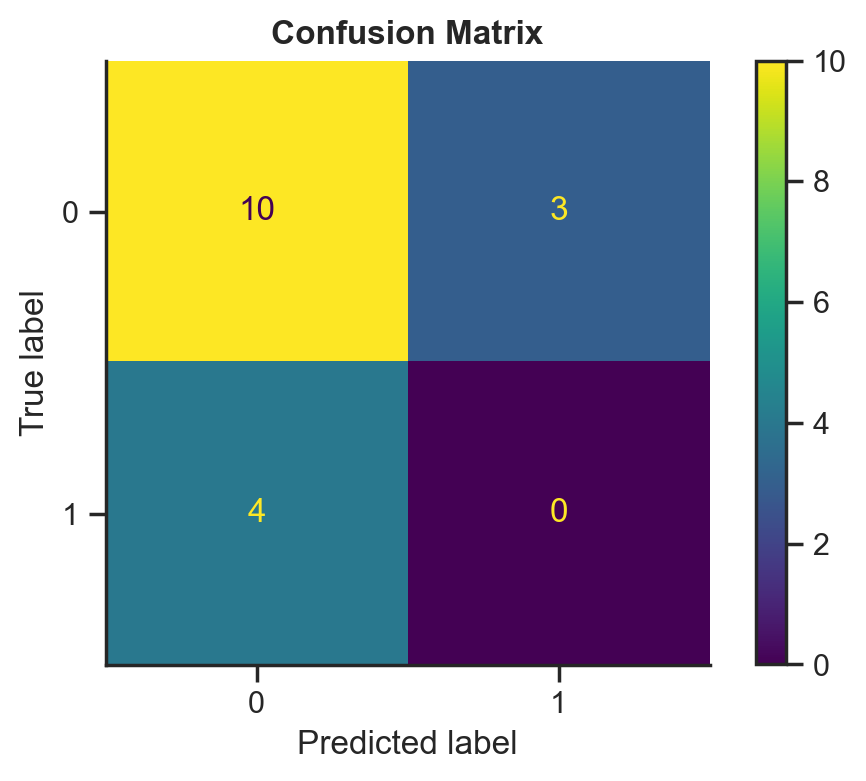

=============== Classification Report ===============
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.00      0.00      0.00         4

    accuracy                           0.59        17
   macro avg       0.36      0.38      0.37        17
weighted avg       0.55      0.59      0.57        17



In [24]:
plot_confusion_matrix(rf, X_test, y_test)

It works poorly at predicting the presence of Kyphosis. Will optimal hyperparameters lead to better performance?

### Optimize Parameters with Cross Validation and GridSearchCV()

Optimizing a Random Forest Model is about finding the best value for **n_estimators**, **criterion**, **max_features** and **max_depth**. So let's see if we can find better parameters values using cross validation in hope that we can improve the accuracy with the **Testing Dataset**.

Since we have multiple parameters to optimize, we will use `GridSearchCV()` to test all possible combinations of the parameters for us.

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [50, 100, 200, 300],
    'max_depth' : [3,4,5,6],
    'min_samples_split' :[2, 3, 4, 5]  
}

optimal_params = GridSearchCV(
        RandomForestClassifier(random_state=123), 
        param_grid,
        cv=5,
        scoring='roc_auc',
        verbose=0
    )

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 50}


In [26]:
# apply the best params
model = RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=50)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=50)

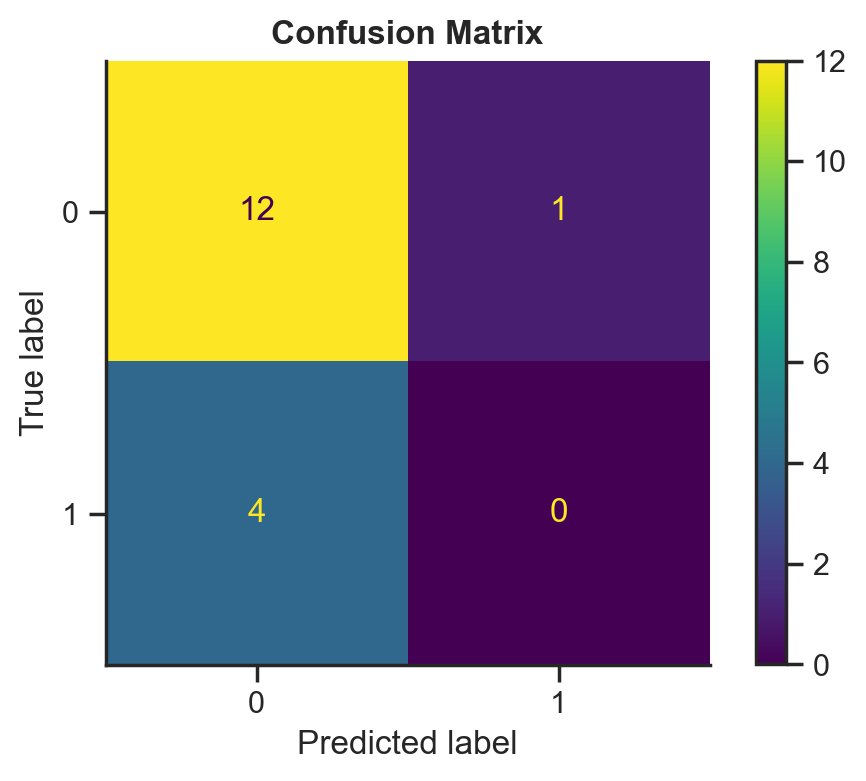

=============== Classification Report ===============
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.00      0.00      0.00         4

    accuracy                           0.71        17
   macro avg       0.38      0.46      0.41        17
weighted avg       0.57      0.71      0.63        17



In [27]:
plot_confusion_matrix(model, X_test, y_test)

After applying the best paramaters, accuracy has increased from 59% to 71%, but it still cannot predict the presence of Kyphosis.

## Conclusion
- In this small and imbalanced dataset, the highest accuracy 76% is from Logistic Regression classifier with customized threshold.